# Scientific Python in a Nutshell

### Objective

We give a quick tour of scientific python libraries (numpy, pandas, scikit-image/learn).  This formed the basis of a runthrough for a 50 min presentation at GWU Physics Department (Nov 2014)

### Environment Setup

Configure notebook style (see NBCONFIG.ipynb), add imports and paths.  The **%run** magic used below <font color='red'>**requires IPython 2.0 or higher.**</font>

In [49]:
%run NBCONFIG.ipynb

Populating the interactive namespace from numpy and matplotlib


### Python is Easy, but slow at math

Python provides a very minimal, readable syntax, which is a big reason why it's so popular for newcomers.  The learning curve gets you up and running fast, but the language is just as deep and Java.  The drawback is that python is relatively slow when it comes to numerics, due to its high-level abstractions like at the `list`.  Let's see how long it takes to multiply item-by-item two lists of numbers.  We'll do the "dot product" or the "vector product" meaning we only mulitply when i and j are the same.

In [50]:
x = range(0,100)
y = range(0,100)

In [51]:
%%timeit
z = []  #Empty container
for i in x:
    for j in y:
        if i == j:
            z.append(i*j)

1000 loops, best of 3: 470 µs per loop


### Numpy is Easy and Fast

In [52]:
x = np.array(x)
y = np.array(y)

In [53]:
%%timeit
z = x*y

The slowest run took 51720.71 times longer than the fastest. This could mean that an intermediate result is being cached 
1 loops, best of 3: 4.05 µs per loop


**That's like 100 times faster!**  Of course, I don't know the first thing about benchmarking.  [Here's a much better comparison.](https://modelingguru.nasa.gov/docs/DOC-1762)

### IPython notebooks display is very rich

Marvel the IPython Notebook [rich display system overview](http://nbviewer.ipython.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%205%20-%20Rich%20Display%20System.ipynb).

In [54]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('1j_HxD4iLn8')

### Rich Display and Fast Numerics (Ipython, Numpy) are the heart of scientific python

In [8]:
from IPython.display import Image
Image(url='http://luispedro.org/files/talks/2013/EuBIAS/figures/sciwheel.png', 
        width=800,
        height=1000)
# IMAGE CREDIT TO AUTHOR AT URL

**Oh, IPython is also a shell!**  No big deal... 

In [5]:
pwd

u'/media/backup/Dropbox/Writeups_Notes_and_Applications/PRESENTATION_2014_GLENIPYTHON'

In [6]:
ls

images/         NBCONFIG.ipynb      secretdata.py   _TEMPLATE.ipynb
maxentropy.pdf  presentation.ipynb  secretdata.pyc


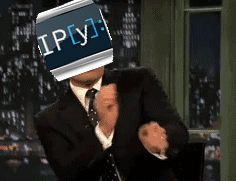

In [14]:
Image(filename='images/ipywin.png')

### Matplotlib for plotting

Matplotlib is the de-facto plotting library in python; it's **built for numpy arrays**.

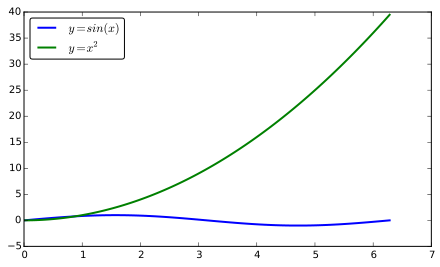

In [57]:
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,np.sin(x), 
         label='$y=sin(x)$')
plt.plot(x, x**2, 
         label='$y=x^2$')
plt.legend(loc='best');

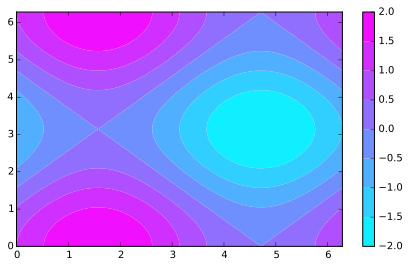

In [58]:
xx, yy = np.meshgrid(x,x)
zz = np.sin(xx) + np.cos(yy)
plt.contourf(xx, yy, zz, cmap='cool')
plt.colorbar();

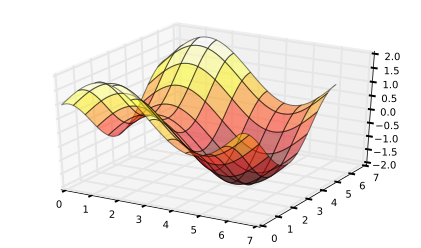

In [59]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='hot', alpha=0.5);

### Scipy: A collection of Routines 

While "SciPy" refers to the overall scientific python ecosystem as we showed above, the `scipy` library a core set of numpy-compatible routines for scientific analysis.  [Check it out here](http://docs.scipy.org/doc/scipy-0.14.0/reference/).  Things like numerical integration, fourier filter etc... are likely to by found in scipy.  More domain-specific utilities; for example, spectroscopy baseline correction algorithms, are more likely to be found in a specialized library like scikit-spectra.

Let's plot the first N bessel functions.

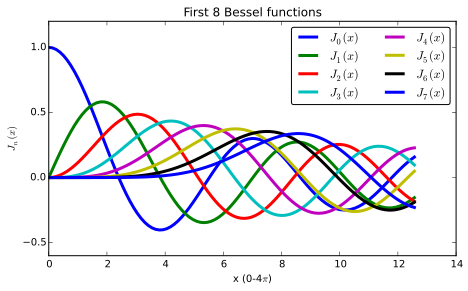

In [60]:
from scipy.special import jn

ORDERMAX = 8

x=np.linspace(0, 4*np.pi, 100)
for order in range(ORDERMAX):
    plt.plot(x, jn(order, x), lw=3) 
    
plt.legend(
    [(r'$J_%s(x)$' % i) for i in range(ORDERMAX)], 
    ncol=2
    ) 
plt.title(r'First %s Bessel functions' % ORDERMAX)
plt.xlabel('x (0-4$\pi$)')
plt.ylabel('$J_n(x)$');

I wonder what the area under the curve is for each of these functions, $J_n(x)$?

In [61]:
from scipy.integrate import simps #Simpsons Rule

for order in range(ORDERMAX):
    fx = jn(order, x)
    area = simps(fx, x) 
    print 'Order: %s\t Area: %.2f' % (order, area)

Order: 0	 Area: 0.83
Order: 1	 Area: 0.84
Order: 2	 Area: 1.14
Order: 3	 Area: 1.21
Order: 4	 Area: 0.95
Order: 5	 Area: 0.75
Order: 6	 Area: 0.85
Order: 7	 Area: 1.13


### Pandas for Tabular Data.  R who?

If your have labeled arrays, you probably want to be using pandas.  The `DataFrame` is an extended numpy array!

In [62]:
import string

CHARS = 26

letters = list(string.uppercase[:CHARS]) #A-Z list
letters[0:5]

['A', 'B', 'C', 'D', 'E']

Generate some random 2d data of dimension 26 x 26

(26, 26)


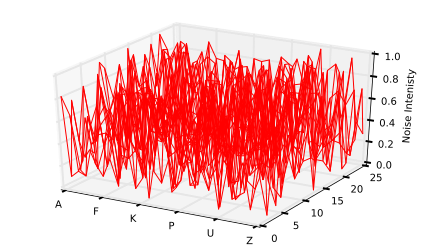

In [63]:
x = range(0,CHARS)

xx, yy = np.meshgrid(x,x)
noise = np.random.random(
                 (CHARS,CHARS) 
                            )

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_wireframe(xx, yy, noise, color='r', linewidth=1);

ax.set_xticklabels(letters[::5])
ax.set_zlabel('Noise Intenisty')
print noise.shape

There is no real coherence between these names and values as labels.  Thus, it's hard to answer these questions:

   - At which coordinates is the noise maximum (ie A5 vs. G23)?
   - What is the covariance between A1 and D5?
   - How do I drop data for arrays A, B, C and F-G?
   
The pandas dataframe is great for this!

#### The DataFrame and basic stats

In [64]:
from pandas import DataFrame

df = DataFrame(noise, columns=letters)
df

A         B         C         D         E         F         G  \
0   0.825725  0.668946  0.182936  0.670988  0.273230  0.164071  0.336452   
1   0.077710  0.139728  0.108210  0.413371  0.511973  0.538218  0.485296   
2   0.753016  0.213415  0.630987  0.421803  0.906054  0.412137  0.907543   
3   0.366397  0.866364  0.385036  0.544308  0.648767  0.036624  0.311187   
4   0.193091  0.497641  0.694096  0.144089  0.478733  0.834893  0.450388   
5   0.242109  0.078181  0.297507  0.648459  0.023584  0.697821  0.797484   
6   0.190694  0.915790  0.385917  0.520389  0.770143  0.369309  0.812177   
7   0.480564  0.612366  0.450222  0.186143  0.167433  0.257690  0.713397   
8   0.973618  0.530335  0.716222  0.032624  0.513907  0.763750  0.585654   
9   0.904868  0.647672  0.958050  0.620615  0.902284  0.714537  0.780837   
10  0.389185  0.189370  0.155235  0.414885  0.372777  0.013528  0.394150   
11  0.200429  0.419116  0.913159  0.161454  0.663785  0.485785  0.336873   
12  0.713065  0.221998  0.990179  0.118564  0.320856  0.856472  0.228816   
13  0.135266  0.912900  0.686578  0.753034  0.383137  0.447777  0.628437   
14  0.989964  0.256020  0.850211  0.575504  0.578429  0.522223  0.423562   
15  0.285214  0.482681  0.516800  0.158880  0.367207  0.905431  0.404249   
16  0.012044  0.911055  0.292197  0.124289  0.728899  0.973618  0.475561   
17  0.358458  0.776963  0.467270  0.937415  0.293886  0.414415  0.169943   
18  0.581838  0.164739  0.155392  0.356223  0.626919  0.938359  0.402660   
19  0.940907  0.602338  0.825855  0.474857  0.904405  0.908822  0.079719   
20  0.540111  0.885209  0.821457  0.964364  0.219187  0.542198  0.802016   
21  0.996520  0.868012  0.539605  0.150934  0.353905  0.509981  0.338919   
22  0.470348  0.379161  0.286576  0.924937  0.524945  0.614741  0.969161   
23  0.079627  0.199115  0.585538  0.495121  0.145273  0.066960  0.086486   
24  0.538422  0.890246  0.014862  0.696751  0.522310  0.052983  0.115387   
25  0.745086  0.842063  0.410827  0.549917  0.148326  0.527624  0.522055   

           H         I         J    ...            Q         R         S  \
0   0.098517  0.993220  0.791704    ...     0.423473  0.208776  0.958277   
1   0.895174  0.916756  0.451292    ...     0.408121  0.819615  0.585384   
2   0.456577  0.045337  0.157096    ...     0.565137  0.305768  0.841734   
3   0.910758  0.635087  0.891489    ...     0.303940  0.122324  0.440757   
4   0.318686  0.237910  0.539244    ...     0.509148  0.674682  0.692383   
5   0.116827  0.805665  0.585901    ...     0.768989  0.132789  0.470252   
6   0.862084  0.116473  0.019827    ...     0.939657  0.625555  0.166569   
7   0.845862  0.612918  0.766884    ...     0.551752  0.940379  0.533197   
8   0.213443  0.762664  0.482945    ...     0.629139  0.080226  0.110038   
9   0.633529  0.586936  0.527686    ...     0.283396  0.553511  0.593496   
10  0.442471  0.583516  0.104140    ...     0.900960  0.809804  0.527144   
11  0.136595  0.199959  0.265115    ...     0.748083  0.411308  0.422960   
12  0.866289  0.268163  0.937057    ...     0.246149  0.272947  0.316033   
13  0.642871  0.467447  0.248627    ...     0.921102  0.096938  0.376008   
14  0.019814  0.613910  0.021523    ...     0.925865  0.789549  0.822940   
15  0.750791  0.924970  0.526161    ...     0.795153  0.528276  0.887340   
16  0.707930  0.926863  0.169863    ...     0.924633  0.167123  0.342092   
17  0.689349  0.987754  0.702160    ...     0.948342  0.284599  0.963051   
18  0.372692  0.090110  0.588918    ...     0.241168  0.405697  0.269990   
19  0.181253  0.726256  0.092394    ...     0.661063  0.097765  0.666511   
20  0.880332  0.831232  0.333812    ...     0.014353  0.312452  0.677600   
21  0.441839  0.128419  0.609501    ...     0.667840  0.739994  0.222748   
22  0.831564  0.821235  0.618984    ...     0.868911  0.742398  0.322644   
23  0.428732  0.731786  0.670465    ...     0.857377  0.568368  0.382132   
24  0.823281  0.767438  0.538197    ...     0.813842  0.29

In [65]:
print df.max()

A    0.996520
B    0.915790
C    0.990179
D    0.964364
E    0.906054
F    0.973618
G    0.969161
H    0.910758
I    0.993220
J    0.937057
K    0.940142
L    0.898636
M    0.894958
N    0.974844
O    0.950007
P    0.967181
Q    0.948342
R    0.940379
S    0.963051
T    0.996823
U    0.991804
V    0.976302
W    0.966589
X    0.993097
Y    0.991468
Z    0.958567
dtype: float64


Indexing and states are really intuitive in pandas.  

In [66]:
df['A'].std()

0.31776848549593967

In [67]:
df.loc[:, 'A':'F'].std()

A    0.317768
B    0.292952
C    0.282066
D    0.272614
E    0.247651
F    0.296144
dtype: float64

How bout the covariance matrix?  This will tell us how correlated the times are.  For example, how correlated is A1 with B9?  Because the data is random, **they should not be correlated!**, except along the diagonal which is the correlation of a point with itself!

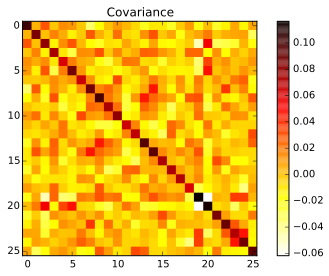

In [68]:
imshow(df.cov(),
           cmap='hot_r',
          interpolation='nearest' #No smoothing
          )

plt.title('Covariance')
plt.colorbar()
df.cov().iloc[0:5, 0:5];

#### Scatter plots/Interactive MPLD3

Let's plot a scatter plot of the average values of the data.  But let's size the points relative to the stnd deviation of the columns!

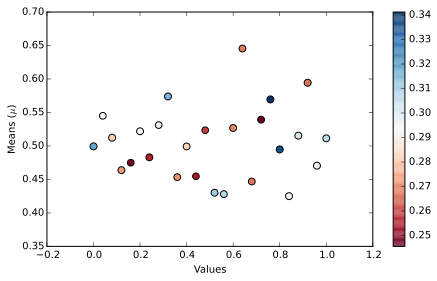

In [69]:
means = df.mean()
std = df.std()
maxes = df.max()

x = np.linspace(0,1,len(means))

scatter = plt.scatter(x, means, c=std, s=maxes*50, cmap='RdBu')
plt.ylabel('Means ($\mu$)')
plt.xlabel('Values')
plt.colorbar()
fig, ax = plt.gcf(), plt.gca(); #Store figure for next cell

We can use the new [mpld3 wrapper](https://github.com/jakevdp/mpld3) or the cool startup [plotly](https://plot.ly/?gclid=CjwKEAiAv7ajBRCIldS7rp7wzFkSJAAA1n4D97gzdGbxTwOQL63uSeLWnFbjx0FnQqZQfRXQnBMm_xoCfE7w_wcB), to get some **interactive action** going.  

**(Dependencies required to run this portion of notebook.)**

In [72]:
import mpld3

points = zip(means, std, maxes)

tooltip = mpld3.plugins.PointLabelTooltip(scatter, 
           labels=['mean:%.2f, sig:%.2f, max:%.2f' % p for p in points])

ax.set_title('NOW INTERACTIVE!')
mpld3.plugins.connect(fig, tooltip)
mpld3.display_d3(fig)

/home/glue/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpld3-0.3git-py2.7.egg/mpld3/utils.py:50: DeprecationWarning: mpld3.display_d3 is deprecated and will be removed.  Use mpld3.display instead
  category=DeprecationWarning)


This is a testament to the ability of the rich display system of the notebook.  Since it runs in the browser, it can do kewl stuff!

#### Boolean indexing and handling missing data is also a very easy in numpy/pandas

A      B      C      D      E
0   True   True  False   True  False
1  False  False  False  False   True
2   True  False   True  False   True
3  False   True  False   True   True
4  False  False   True  False  False

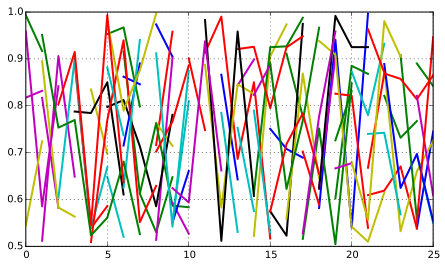

In [73]:
masks = df > 0.5
df[masks].plot(legend=False)
masks.iloc[0:5, 0:5]

#### What kind of secret array is this?

In [3]:
from secretdata import secret, appropriate_response

print secret.shape, type(secret), '\n\n', secret

(512, 512, 3) <type 'numpy.ndarray'> 

[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ..., 
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ..., 
 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ..., 
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ..., 
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ..., 
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


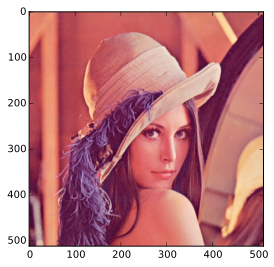

In [87]:
imshow(secret) 

It's muh gurl [Lena](http://en.wikipedia.org/wiki/Lenna)!  Daaamn!

In [2]:
appropriate_response

By the way, `Imshow()` is a matplotlib image plotting function; implicitly imported when we called pylab/NBCONFIG at the top of the program!

### Scikit Image and Numpy

**Images are numpy arrays so all numpy array operations like arithmetic, slicing and masking all work by default!**  Let's use some scikitimage sample data to show this.

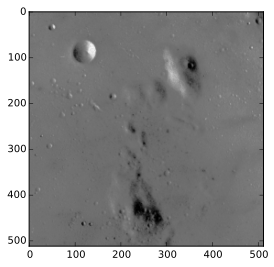

In [76]:
from skimage.data import moon

datmoon = moon()
imshow(datmoon, cmap='gray');

MEAN BRIGHTNESS: 112.169570923


array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

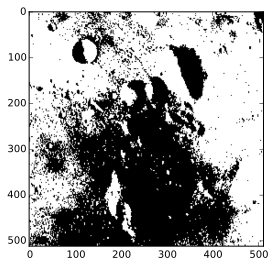

In [77]:
# MASKING

mean_brightness = np.mean(datmoon)
print 'MEAN BRIGHTNESS: %s' % mean_brightness

mask = datmoon > mean_brightness
imshow(mask, cmap='gray')
mask

Let's merge lena and the moon by converting lena down to 1-channel

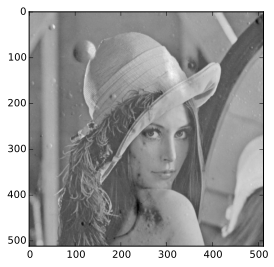

In [78]:
from skimage.color import rgb2gray

lenagray = rgb2gray(secret)*255 #Scale factor
imshow(lenagray + datmoon, cmap='gray');

#### Scikit Image Image Processing Algorithms

Scikit image also has tons of image processing tools (duh)!  Consider the Sobel operator that computes the gradient of the image.  Let's do this on the moon:

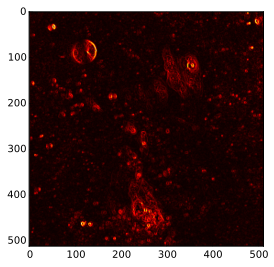

In [79]:
from skimage.filter import sobel

imshow( sobel(datmoon), cmap='hot' ); #Artificial color

I'll go ahead and combine the sobel edges back with the original images to sharpen it.  The sobel values are pretty small, so let me enhance them by a **FACTOR**

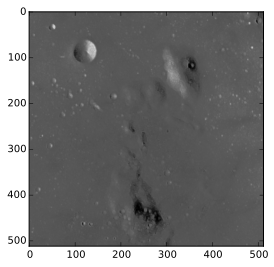

In [80]:
FACTOR = 250

enhanced = sobel(datmoon)*FACTOR + datmoon
imshow(enhanced, cmap='gray');

Another kewl image processing concept is entropy [(see additional example)](http://scikit-image.org/docs/dev/auto_examples/plot_entropy.html)

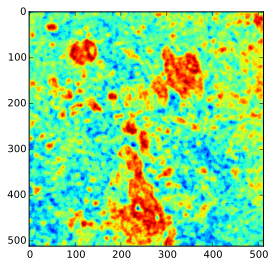

In [81]:
from skimage.filter.rank import entropy
from skimage.morphology import disk

imshow(entropy(datmoon, disk(5) ) )

### Let's learn something: Scikit Learn

I will borrow a [cool examples from sklearn](http://scikit-learn.org/stable/auto_examples/neighbors/plot_species_kde.html), written by Jake Vanderplas (also the author of MPLD3).  Based on the original wok, [Maximum Entropy Modeling of Species Geographic Distributions (2006)](http://www.cs.princeton.edu/~schapire/papers/ecolmod.pdf).  I cut a few lines out of the example, so please refer to the original linked example.

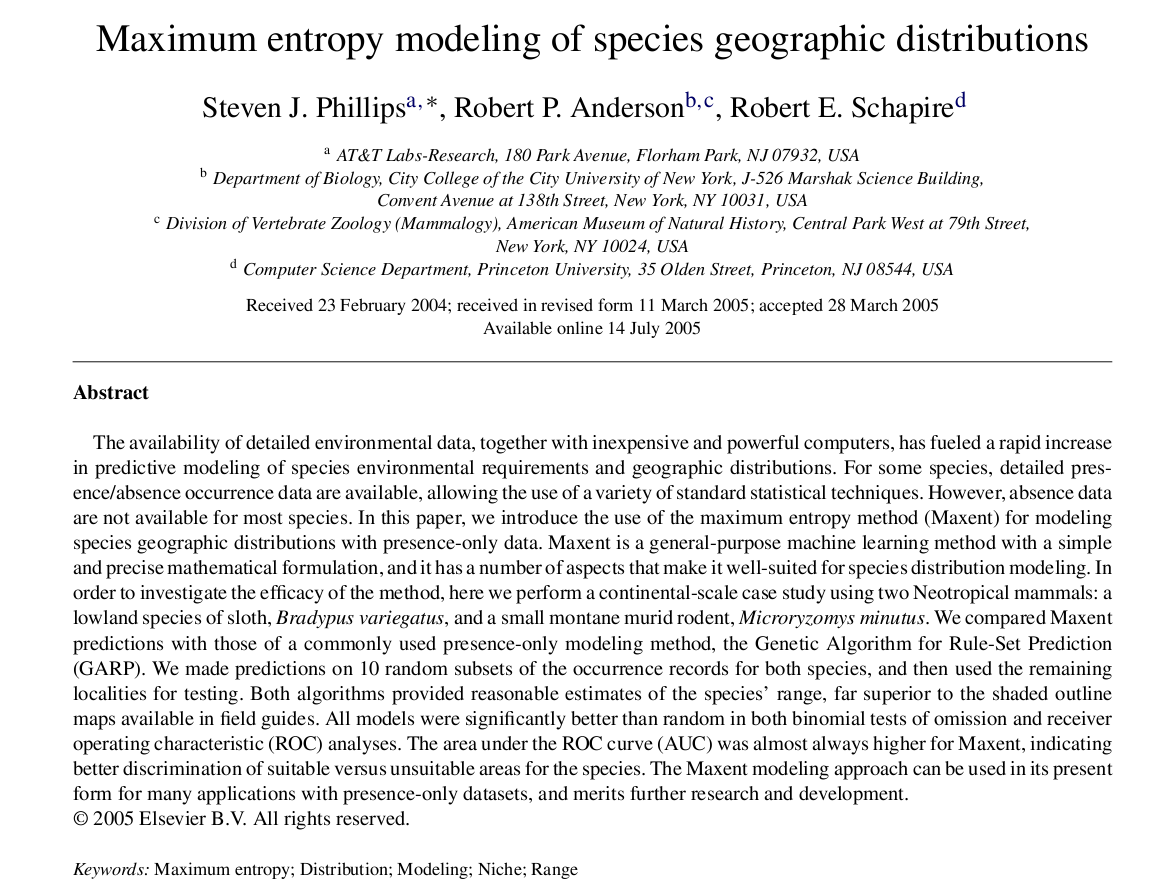

In [82]:
Image('images/abstract.png', width=800)

**Some key ideas of the paper**:
    
    We are interested in devising a model of a species’
    environmental requirements from a set of occurrence
    localities [long/lattitude], together with a set of environmental vari-
    ables that describe some of the factors that likely
    influence the suitability of the environment for the
    species

And

    Modeling techniques that require only presence data are therefore
    extremely valuable
    
Turns out that

    [Maxentropy] is a general-purpose method for making
    predictions or inferences from incomplete information.
    Its origins lie in statistical mechanics (Jaynes, 1957),

Look at sloth and rodent

    2.4.1. Study species
    The brown-throated three-toed sloth Bradypus var-
    iegatus (Xenarthra: Bradypodidae) is a large arbo-
    real mammal (3–6 kg) that is widely distributed in the
    Neotropics from Honduras to northern Argentina. 

Some variables they use:

    The environmental variables fall into three categories: climate, elevation
    and potential vegetation. All variables are recorded at
    a pixel size of 0.05◦ by 0.05◦ , yielding a 1212 × 1592
    grid, with 648,658 pixels containing data for all vari-
    ables.

What they predicted:

    Where the species are likely to be found, given what we know of 
    where they are already and what environmental factors are there.

**Here are the actual locations of the sloth, rodent**

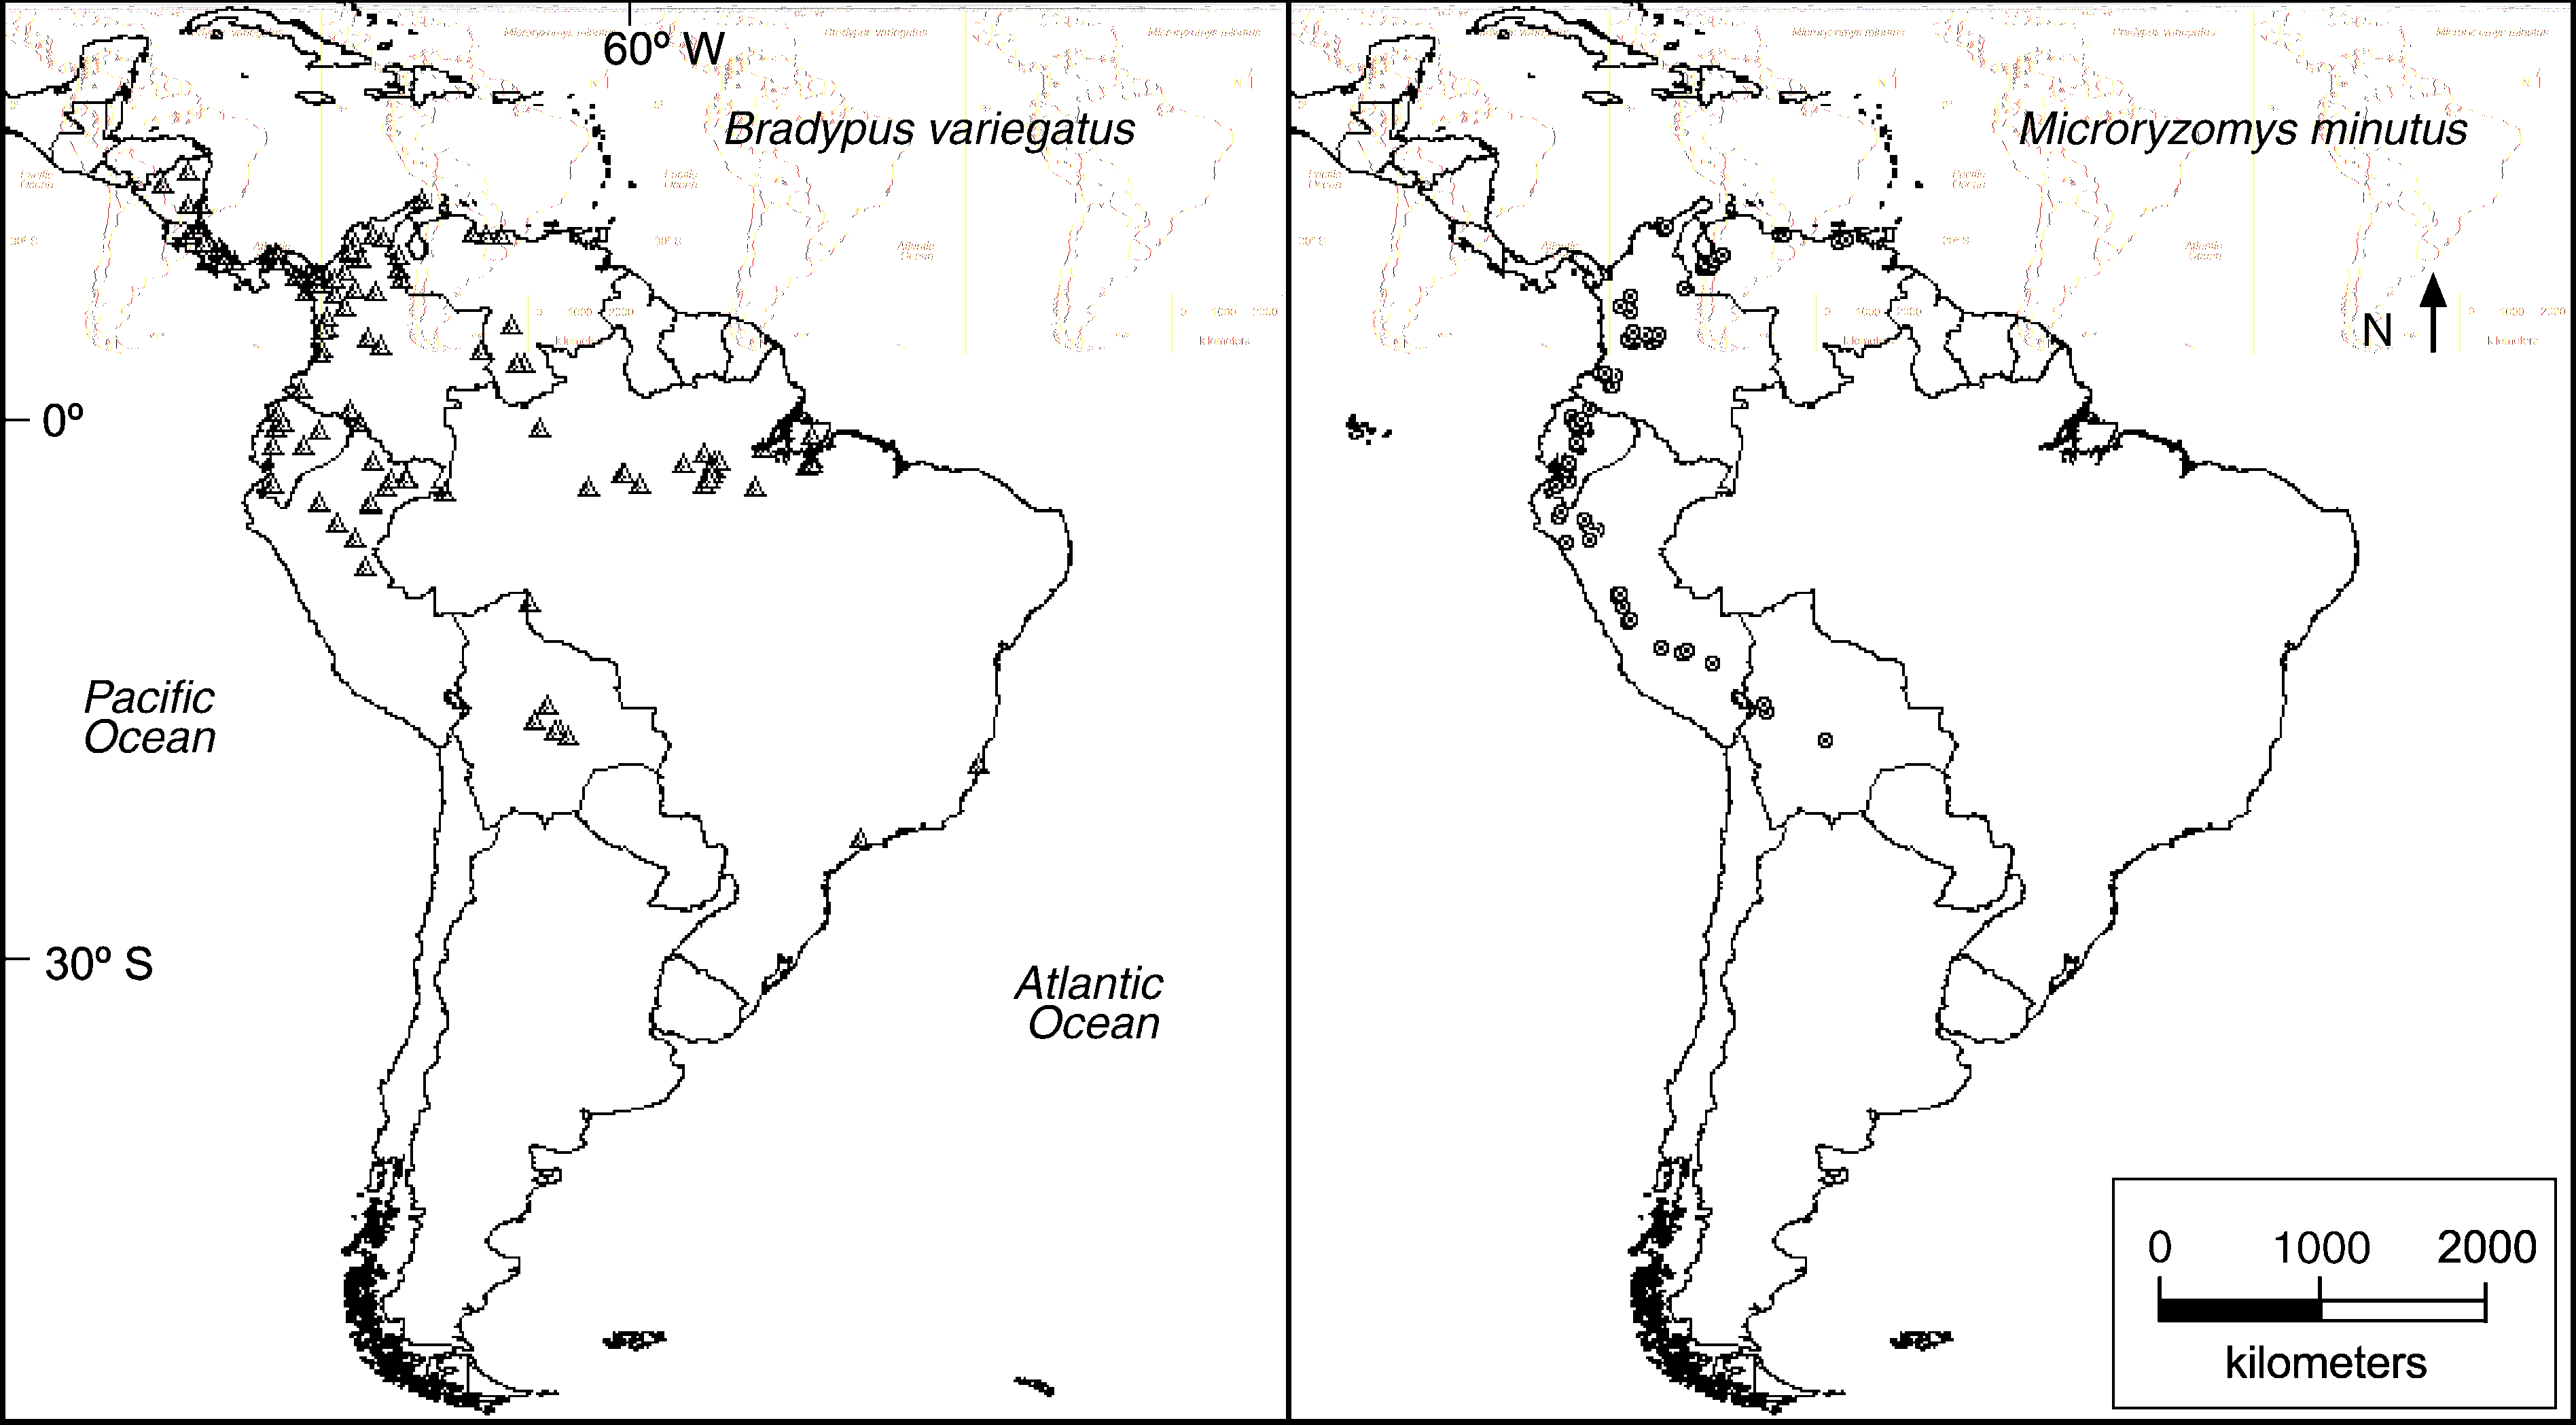

In [83]:
Image('images/actual_regions.png', width=700, height=500)

**Here are the predictions**

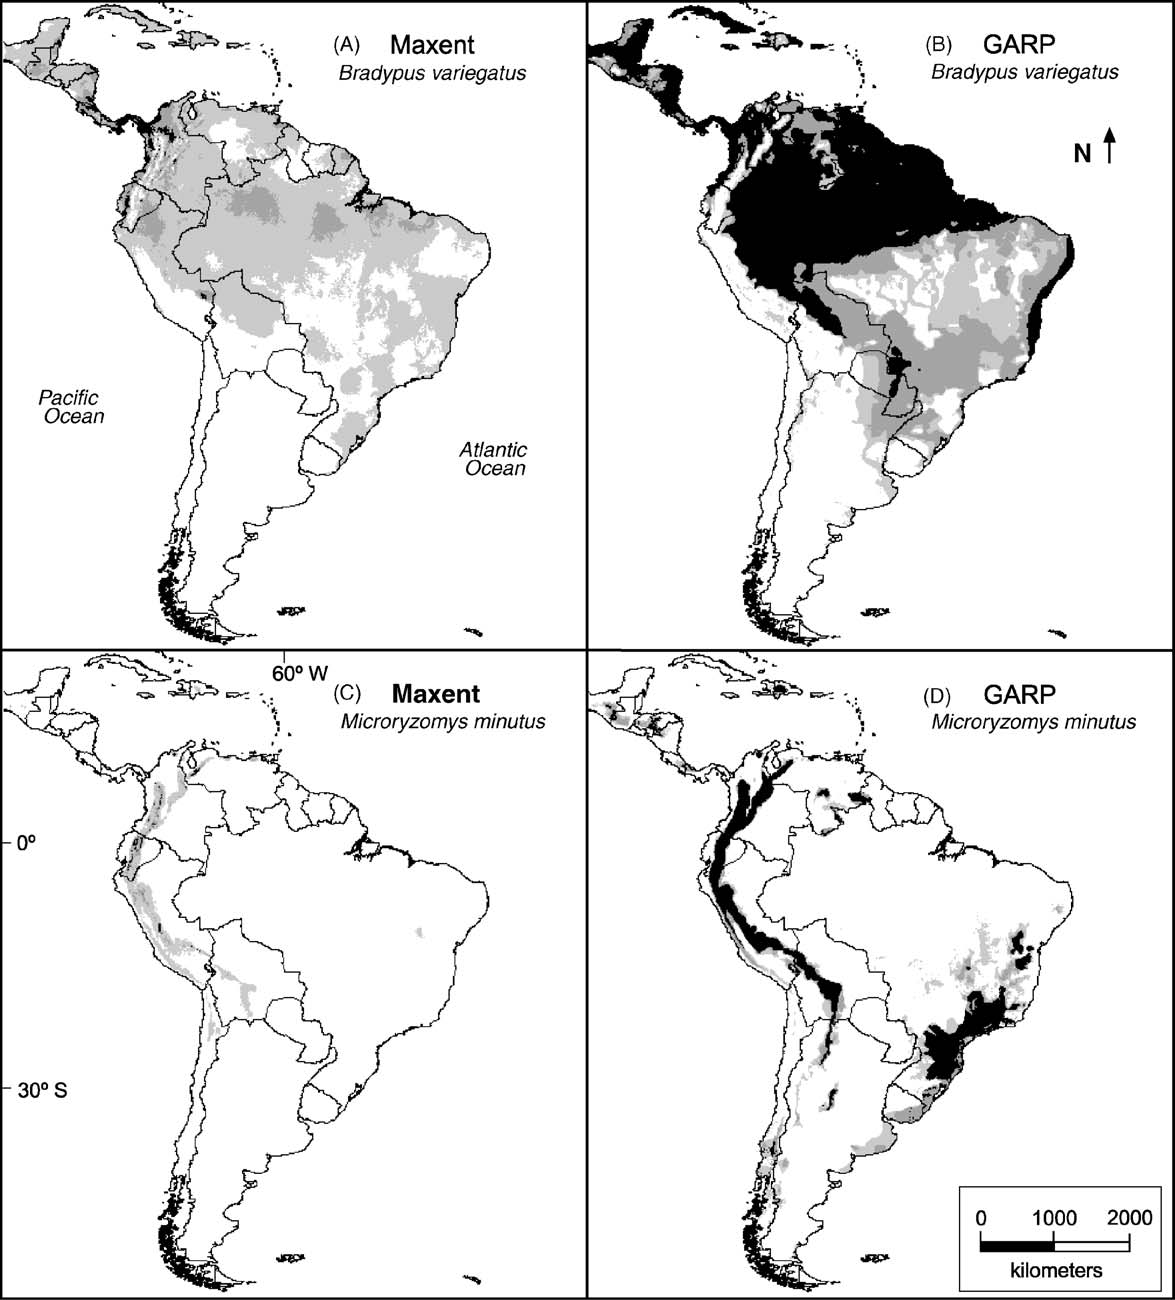

In [84]:
Image('images/predictions.png', height=1000, width=700)

 - computing KDE in spherical coordinates
Fitting with data 0
 - plot coastlines using basemap
Fitting with data 1
 - plot coastlines using basemap


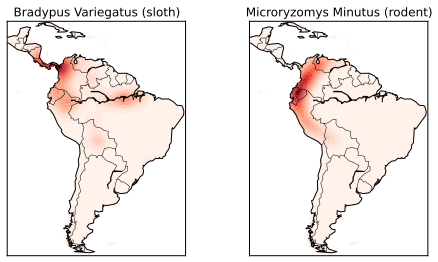

In [85]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids
from sklearn.neighbors import KernelDensity

# Need Basemap
from mpl_toolkits.basemap import Basemap

# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus (sloth)', 'Microryzomys Minutus (rodent)']

#Lattitude/Longitude stuff
Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T

# Array that stores species data
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')

 # Convert lat/long to radians
Xtrain *= np.pi / 180. 

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]

# -9999 is ocean; mask only areas corresponding to land in the map
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Set up 2 adjacent, empty plots
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

# construct a kernel density estimate of the distribution
print(" - computing KDE in spherical coordinates")
kde = KernelDensity(bandwidth=0.04, 
                        metric='haversine',
                        kernel='gaussian',
                        algorithm='ball_tree')

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # Actually fits the data
    print 'Fitting with data %s' % i
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = -9999 + np.zeros(land_mask.shape[0])
    
    # Bam, score samples: this is where prediction is being done
    Z[land_mask] = np.exp(kde.score_samples(xy)) 
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    print(" - plot coastlines using basemap")
    map_murica = Basemap(projection='cyl', #type of colormap
                         llcrnrlat=Y.min(),
                         urcrnrlat=Y.max(),
                         llcrnrlon=X.min(),
                         urcrnrlon=X.max(),
                         resolution='c')

    map_murica.drawcoastlines()
    map_murica.drawcountries()

    plt.title(species_names[i])

plt.show()

If someone with domain knowledge could elabore on how the KDE of these settings is equivalent to maximum entropy (or is Jake not using max entropy?), I'd appreciate that big time.

<hr>
<br>


<div style="float:left; \">
    <img src="https://avatars0.githubusercontent.com/u/1972276?s=460" 
 align=left; text-align:center; style="float:left; margin-left: 5px; margin-top: -25px; width:150px; height:150px" /> 
</div>

<div style="float:left; \"><a href="https://github.com/hugadams">
    <img src="https://assets-cdn.github.com/images/modules/logos_page/GitHub-Mark.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>


<div style="float:left; \"><a href="https://twitter.com/hughesadam87">
    <img src="http://paymentmagnates.com/wp-content/uploads/2014/04/twitter-icon.png" 
 align=left; text-align:center; style="float:left; margin-left: 25px; margin-top: -25px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.researchgate.net/profile/Adam_Hughes2?ev=hdr_xprf">
    <img src="http://www.txhughes.com/images/button-researchgate.png" 
 align=left; text-align:center; style="float:left; margin-left: -175px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:left; \"><a href="https://www.linkedin.com/profile/view?id=121484744&trk=nav_responsive_tab_profile_picg">
    <img src="http://smallbusinessesdoitbetter.com/wordpress/wp-content/uploads/li.png" 
 align=left; text-align:center; style="float:left; margin-left: -75px; margin-top: 55px; width:75px; height:75px" /> 
</div>

<div style="float:center; \"><a href="http://www.gwu.edu/">
    <img src="https://raw.githubusercontent.com/hugadams/pyparty/master/pyparty/data/gwu.png" 
 align=center style="float:center; margin-right: 30px; margin-top: -35px; width:335px; height:180px" />
</div>


<h4 style="margin-top:0px;"> This notebook is free for redistribution. If citing, please reference as: </h4>
- *Hughes, A. (2012). [A Computational Framework for Plasmonic Nanobiosensing](https://www.researchgate.net/publication/236672995_A_Computational_Framework_for_Plasmonic_Nanobiosensing).  Python in Science Conference [SCIPY].* 


<h3 style="margin-top:30px;"> Questions or Feedback? </h3>

* pyuvvis@groups.google.com
* hugadams@gwmail.gwu.edu 
* twitter:  <a href="https://twitter.com/hughesadam87" target="_blank">@hughesadam87</a>
* <a href="http://www.gwu.edu/~condmat/CME/reeves.html" target="_blank">Mark Reeves Biophysics Group</a>




<h3 style="margin-top:30px;"> References: </h3>

* [1] : **REF 1**
* [2] : **REF 2**





<h3 style="margin-top:30px;"> Related: </h3>

   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyuvvis: Exploratory Spectral Data Analysis</a>
   * <a href="https://github.com/hugadams/pyparty" target="_blank">pyparty: Image Analysis of Particles</a>
   * <a href="http://lorenabarba.com/" target="_blank">Lorena A. Barba (GWU Engineering)</a>
   * <a href="http://www.youtube.com/watch?v=W7RgkHM-B60" target="_blank">xray: extended arrays for scientific datasets</a>



<h3 style="margin-top:30px;">Notebook styling ideas:</h3>

* <a href="http://blog.louic.nl/?p=683" target="_blank">Louic's web blog</a>
* <a href="https://plot.ly/feed" target="_blank">Plotly</a>
* <a href="http://damon-is-a-geek.com/publication-ready-the-first-time-beautiful-reproducible-plots-with-matplotlib.html" target="_blank">Publication-ready the first time: Beautiful, reproducible plots with Matplotlib</a>

<br>
<hr>